In [97]:
#**********************************************COVID19*************************************************************************
#********************************************************************************************************************************
#*******************************************************************************************************************************
#ANALISIS DEL FICHEROS
#https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv
#Cargamos el fichero de doctores la ruta de kaggle:
#https://www.kaggle.com/antgoldbloom/doctors-and-nurses-per-1000-people-by-country
#Cargamos el fichero de contagios a nivel mundial. 
#https://www.kaggle.com/dylansp/covid19-country-level-data-for-epidemic-model#Country_Level_Info.csv
#La ruta del fichero de covid19 es: 

#import libraries
import numpy as np
import pandas as pd
#Importo las librerias para la representacion grafica. 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser

#Importamos las librerias para los arboles de decision
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
#Importamos las librerias para realizar RandomForest. 
from sklearn.ensemble import RandomForestRegressor

#Importamos las librerias para Clustering
# K-Means clustering algorithm
from sklearn.cluster import KMeans

#Librerias para PCA(Analisis de Componentes Principales)
# PCA dimension reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#Para plotear bonitas figuras en jupyter. 
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = True

#Si queremos representar 3d
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D



In [98]:

#Abrimos los datos del fichero de entrenamiento.
#En este caso tenemos el fichero dividido por ';' por lo que le ponemos el";" para marcar el ;"
df = pd.read_csv('AlmacenDatos/Covid19_Spain.csv',sep=';', encoding = 'unicode_escape')
#Mostramos la cabecera de los casos de contagiados y muertos desde el inicio de la epidemia. 
df['Mujeres']

0      2521560
1      4221780
2      3324805
3      2521560
4      4221780
5       302335
6      3801960
7      3324805
8      2521560
9      4221780
10      302335
11     3801960
12     3324805
13     1118440
14     2521560
15     4221780
16      302335
17     1043405
18     3801960
19     3324805
20     1118440
21     2521560
22     4221780
23      302335
24     1280560
25     1043405
26     3801960
27     3324805
28     1118440
29      160670
        ...   
627    3801960
628     554930
629    1431660
630     547745
631     724420
632    3324805
633      39255
634     320855
635    1118440
636     160670
637    2521560
638    4221780
639     674195
640     559150
641     302335
642      40750
643    1280560
644    1043405
645    1043080
646    3801960
647     554930
648    1431660
649     547745
650     724420
651    3324805
652      39255
653     320855
654    1118440
655     160670
656    2521560
Name: Mujeres, Length: 657, dtype: int64

In [99]:
df.describe()

,Region Desc,CASOS,Fallecidos,Hospitalizados,Recuperados,UCI,Densidad,Medicos,Hombres,Mujeres,...,Ratio_Num_Fallecidos,Num_Recuperados,Ratio_Num_Recuperados,Num_Hospitalizados,Ratio_Num_Hospitalizados,Num_UCI,Ratio_Num_UCI,Ratio_Medicos,Ratio_Camas,dias_desde_caso_10
count,0.0,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,632.000000,6.570000e+02,6.570000e+02,...,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,632.000000,657.000000,657.000000
mean,NaN,3105.383562,271.899543,1560.882801,753.940639,174.153729,499.751294,420.675443,1.349102e+06,1.385108e+06,...,0.793435,84.721461,2.831795,102.712329,3.801883,11.368341,0.381830,56.995030,38.131412,17.348554
std,NaN,6360.666925,766.935467,3401.711967,2549.912488,381.511079,1284.992931,100.304545,1.251111e+06,1.291175e+06,...,1.153248,233.901304,6.292230,262.987493,5.605921,29.714620,0.599427,147.096899,57.611495,10.755117
min,NaN,10.000000,0.000000,0.000000,0.000000,0.000000,25.700000,254.660000,4.206500e+04,3.925500e+04,...,0.000000,-27.000000,-2.008000,-661.000000,-10.293000,-44.000000,-0.685000,3.861000,2.620000,0.000000
25%,NaN,92.000000,1.000000,22.000000,1.000000,3.000000,62.300000,350.720000,5.160300e+05,5.477450e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.559000,11.142000,8.000000
50%,NaN,878.000000,26.000000,300.000000,19.000000,41.000000,110.400000,420.580000,1.039575e+06,1.043080e+06,...,0.273000,3.000000,0.186000,26.000000,1.868000,2.000000,0.167000,22.796000,15.079000,17.000000
75%,NaN,2846.000000,159.000000,1311.000000,283.000000,137.000000,236.800000,497.260000,1.341270e+06,1.431660e+06,...,1.094000,44.000000,2.915000,83.000000,5.394000,10.000000,0.543000,36.984000,31.385000,26.000000
max,NaN,44783.000000,5972.000000,21530.000000,22414.000000,2582.000000,6049.900000,783.590000,4.149490e+06,4.221780e+06,...,5.916000,1573.000000,94.030000,2005.000000,33.660000,265.000000,4.347000,938.263000,248.985000,41.000000


In [100]:
#Tenemos todas la columnas del proceso#
df.columns.tolist()

['Fecha',
 'CCAA',
 'Region Desc',
 'CASOS',
 'Fallecidos',
 'Hospitalizados',
 'Recuperados',
 'UCI',
 'NUTS2',
 'Densidad',
 'Medicos',
 'Hombres',
 'Mujeres',
 'Camas',
 'Ratio_Casos',
 'Ratio_Fallecidos',
 'Ratio_Hospitalizados',
 'Ratio_Recuperados',
 'Ratio_UCI',
 'Num_casos',
 'Ratio_Num_casos',
 'Num_Fallecidos',
 'Ratio_Num_Fallecidos',
 'Num_Recuperados',
 'Ratio_Num_Recuperados',
 'Num_Hospitalizados',
 'Ratio_Num_Hospitalizados',
 'Num_UCI',
 'Ratio_Num_UCI',
 'Ratio_Medicos',
 'Ratio_Camas',
 'dias_desde_caso_10']

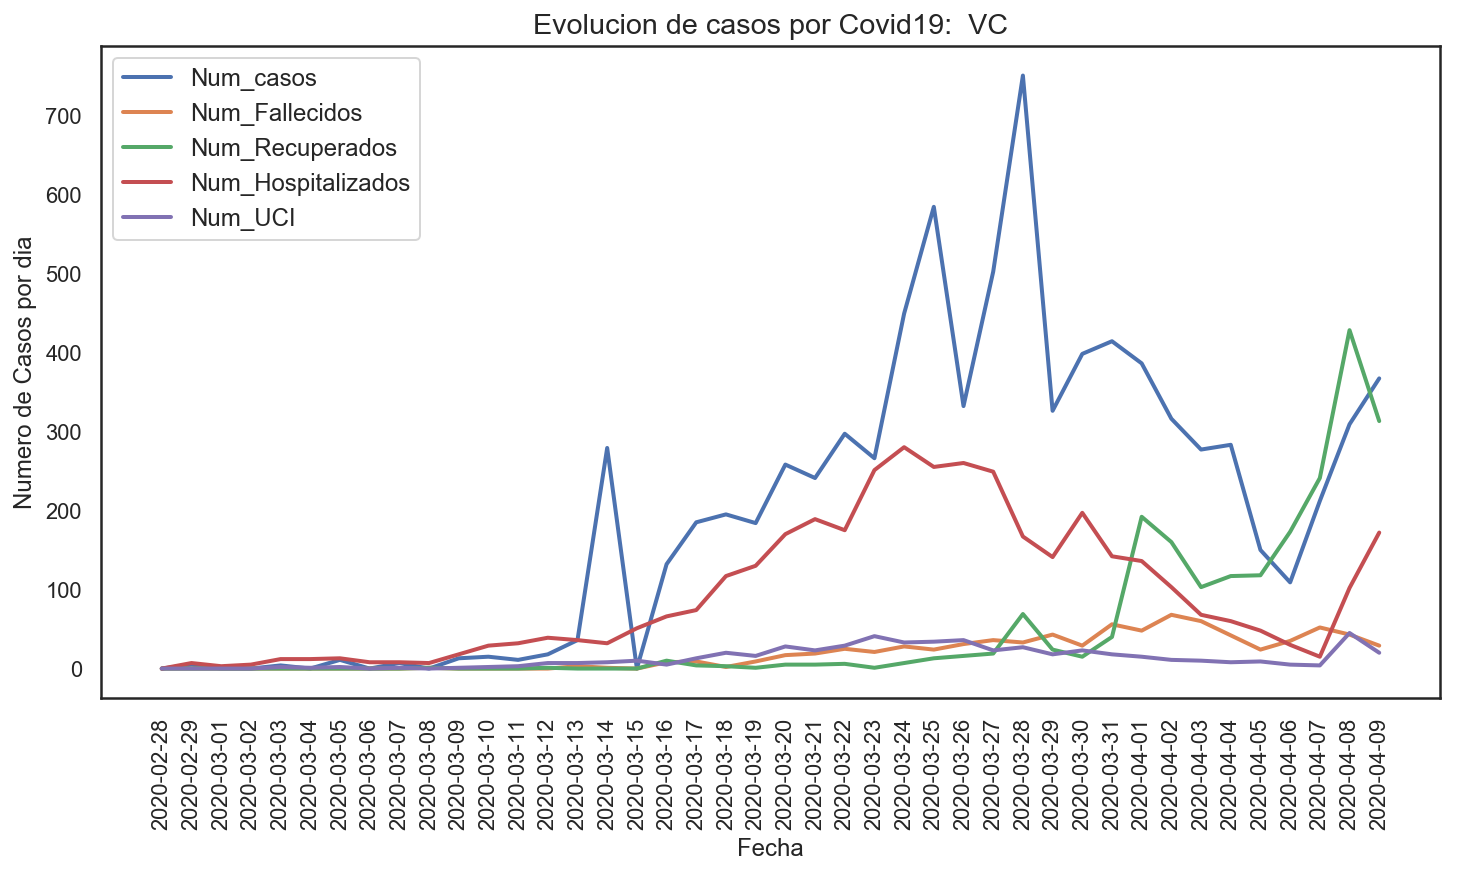

In [101]:
#Vamos a representar por comunidad autonoma. Los datos que se muestran: 
#En el X, representamos la fecha
#En el eje Y numero de casos. 
vc=df[df['CCAA'] == 'VC']
Comunidad ='VC'
#Nos quedamos con la comunidad valenciana. Representamos estos datos. 
#Cogemos como origen de fecha.Y sera nuestro indice. 
vc.set_index('Fecha', inplace=True)
#Seleccionamos los datos que queremos mostrar. 
# Make list of cases and case change rates
casos = ('Num_casos', 'Num_Fallecidos', 'Num_Recuperados', 'Num_Hospitalizados', 'Num_UCI') 
#Representamos los datos para ver la tendencia. 
# Plot cases
plt.figure(figsize=(12,6))
plt.xlabel ('Fecha')
plt.ylabel('Numero de Casos por dia')
plt.title('Evolucion de casos por Covid19:  ' + Comunidad, fontsize='x-large')

plt.plot(vc.index, vc.Num_casos, linewidth=2)
plt.plot(vc.index, vc.Num_Fallecidos, linewidth=2)
plt.plot(vc.index, vc.Num_Recuperados, linewidth=2)
plt.plot(vc.index, vc.Num_Hospitalizados, linewidth=2)
plt.plot(vc.index, vc.Num_UCI, linewidth=2)
#Rotamos  90 grados las fechas para mostrarlo.
plt.xticks(rotation='vertical')

plt.legend(casos, loc='upper left', fontsize='large')
plt.show()

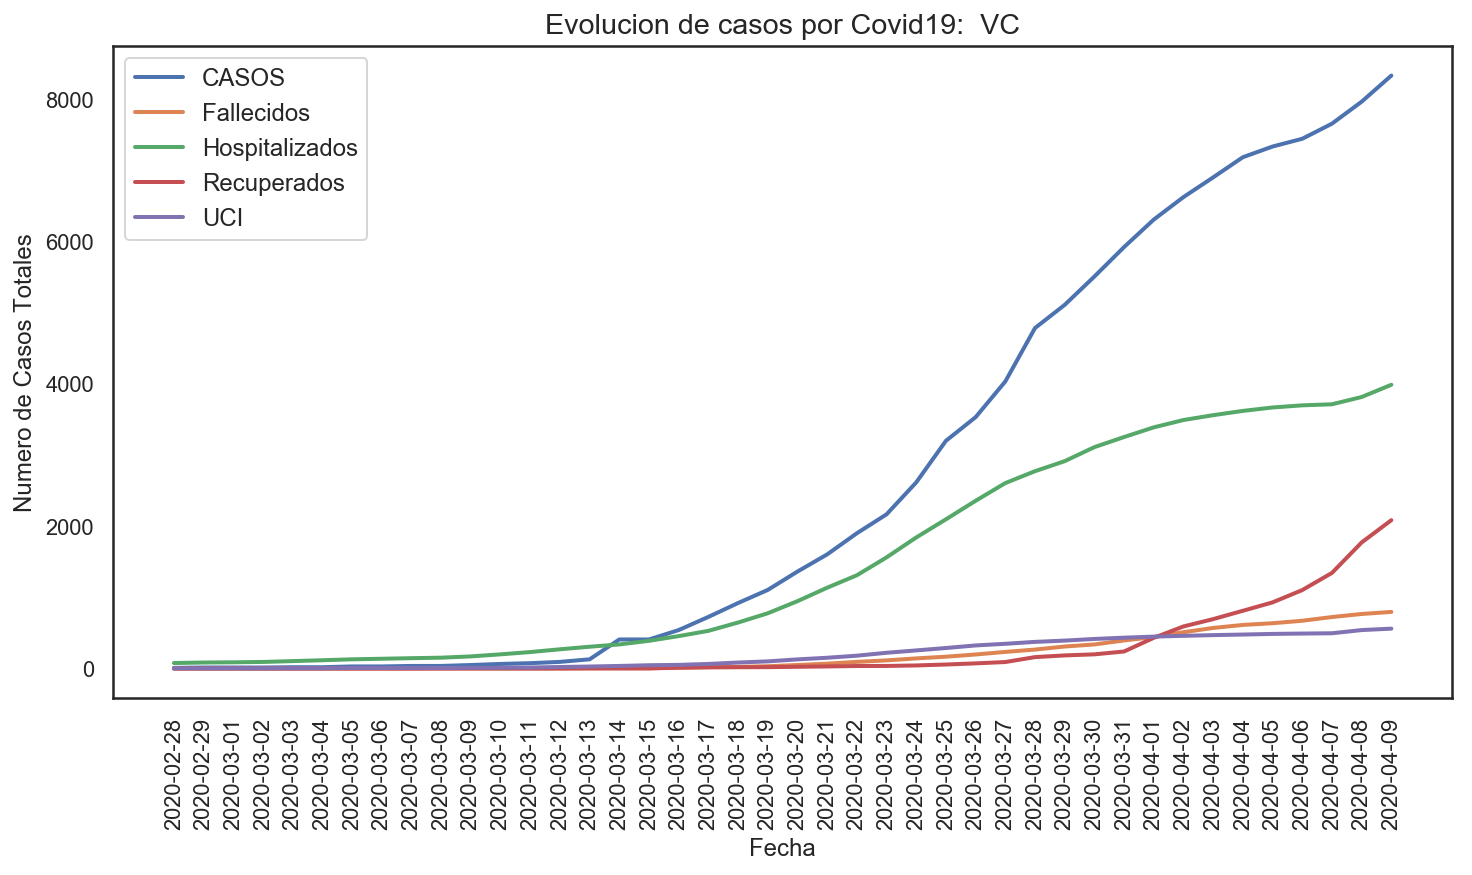

In [102]:
#Tenemos todas la columnas del proceso#
vc.columns.tolist()
#Ahora vamos a comprobar el numero de Fallecidos, Hospitalizados, Recuperados y Uci. Este sera el total segun ha ido el transcurso
#de los dias. 
#vc.set_index('Fecha', inplace=True)
#Seleccionamos los datos que queremos mostrar. 
# Make list of cases and case change rates
casos = ('CASOS','Fallecidos', 'Hospitalizados', 'Recuperados', 'UCI') 
#Representamos los datos para ver la tendencia. 
# Plot cases
plt.figure(figsize=(12,6))
plt.xlabel ('Fecha')
plt.ylabel('Numero de Casos Totales')
plt.title('Evolucion de casos por Covid19:  ' + Comunidad, fontsize='x-large')

plt.plot(vc.index, vc.CASOS, linewidth=2)
plt.plot(vc.index, vc.Fallecidos, linewidth=2)
plt.plot(vc.index, vc.Hospitalizados, linewidth=2)
plt.plot(vc.index, vc.Recuperados, linewidth=2)
plt.plot(vc.index, vc.UCI, linewidth=2)
#Rotamos  90 grados las fechas para mostrarlo.
plt.xticks(rotation='vertical')

plt.legend(casos, loc='upper left',fontsize='large')
plt.show()

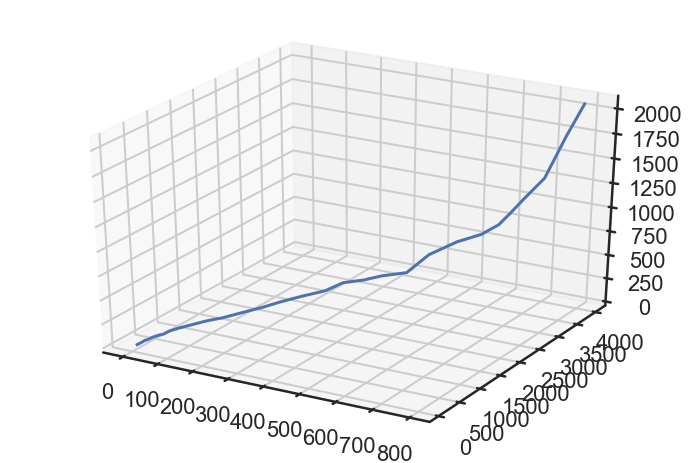

In [103]:
#Aqui tendriamos un ejemplo para usar PCA. https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering
# Creamos un bonito grafico en 3D. 
# Modulos con los que trabajaremos
from mpl_toolkits.mplot3d import axes3d
# Creamos la figura
fig = plt.figure()
# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
# Datos en array bi-dimensional.Es decir es necesario que esten como una matriz
x = np.array([vc['Fallecidos']])
y = np.array([vc['Hospitalizados']])
z = np.array([vc['Recuperados']])
# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.plot_wireframe(x, y, z)

# Mostramos el gráfico
plt.show()

#Si quisieramos trabajar con scatter 
# Datos en array bi-dimensional.Es decir es necesario que esten como una matriz
x = np.array([vc['Fallecidos']])
y = np.array([vc['Hospitalizados']])
z = np.array([vc['Recuperados']])
# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.plot_wireframe(x, y, z)

# Mostramos el gráfico
plt.show()

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='g', marker='o')

# Mostramos el gráfico
plt.show()



In [104]:
#Este tipo de grafico no nos aporta ninguna informacion ya que estamos expuestos a una constante fija como es el calendario de fechas.
#Tenemos todas la columnas del proceso#
df.columns.tolist()

['Fecha',
 'CCAA',
 'Region Desc',
 'CASOS',
 'Fallecidos',
 'Hospitalizados',
 'Recuperados',
 'UCI',
 'NUTS2',
 'Densidad',
 'Medicos',
 'Hombres',
 'Mujeres',
 'Camas',
 'Ratio_Casos',
 'Ratio_Fallecidos',
 'Ratio_Hospitalizados',
 'Ratio_Recuperados',
 'Ratio_UCI',
 'Num_casos',
 'Ratio_Num_casos',
 'Num_Fallecidos',
 'Ratio_Num_Fallecidos',
 'Num_Recuperados',
 'Ratio_Num_Recuperados',
 'Num_Hospitalizados',
 'Ratio_Num_Hospitalizados',
 'Num_UCI',
 'Ratio_Num_UCI',
 'Ratio_Medicos',
 'Ratio_Camas',
 'dias_desde_caso_10']

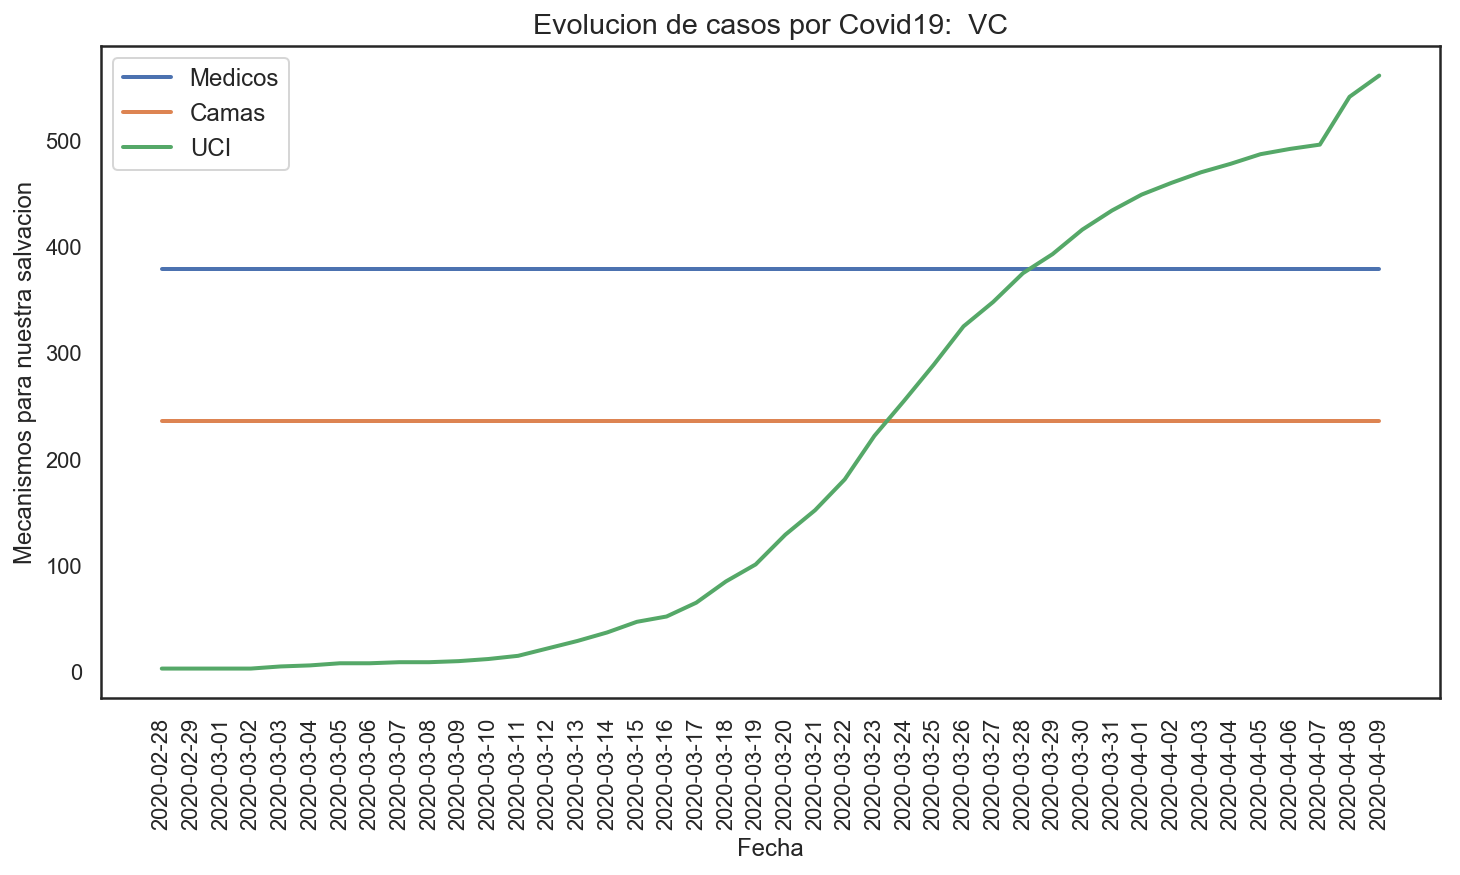

In [105]:
#A partir de los graficos mostrados, como ultima representacion vamos a ver el numero de medicos, camas, y NUTS2.
#Tenemos todas la columnas del proceso#
vc.columns.tolist()
#Ahora vamos a comprobar el numero de Fallecidos, Hospitalizados, Recuperados y Uci. Este sera el total segun ha ido el transcurso
#de los dias. 
#vc.set_index('Fecha', inplace=True)
#Seleccionamos los datos que queremos mostrar. 
# Make list of cases and case change rates
casos = ('Medicos','Camas','UCI') 
#Representamos los datos para ver la tendencia. 
# Plot cases
plt.figure(figsize=(12,6))
plt.xlabel ('Fecha')
plt.ylabel('Mecanismos para nuestra salvacion')
plt.title('Evolucion de casos por Covid19:  ' + Comunidad, fontsize='x-large')
plt.plot(vc.index, vc.Medicos, linewidth=2)
plt.plot(vc.index, vc.Camas, linewidth=2)
plt.plot(vc.index, vc.UCI, linewidth=2)

#Rotamos  90 grados las fechas para mostrarlo.
plt.xticks(rotation='vertical')

plt.legend(casos, loc='upper left',fontsize='large')
plt.show()


In [ ]:
####COMENZAMOS CON EL PROCESO 

In [83]:
df.columns.tolist()

['Fecha',
 'CCAA',
 'Region Desc',
 'CASOS',
 'Fallecidos',
 'Hospitalizados',
 'Recuperados',
 'UCI',
 'NUTS2',
 'Densidad',
 'Medicos',
 'Hombres',
 'Mujeres',
 'Camas',
 'Ratio_Casos',
 'Ratio_Fallecidos',
 'Ratio_Hospitalizados',
 'Ratio_Recuperados',
 'Ratio_UCI',
 'Num_casos',
 'Ratio_Num_casos',
 'Num_Fallecidos',
 'Ratio_Num_Fallecidos',
 'Num_Recuperados',
 'Ratio_Num_Recuperados',
 'Num_Hospitalizados',
 'Ratio_Num_Hospitalizados',
 'Num_UCI',
 'Ratio_Num_UCI',
 'Ratio_Medicos',
 'Ratio_Camas',
 'dias_desde_caso_10']

In [85]:
# Seleccionamos las columnas mas importantes
column_1 = 'Medicos'
column_2 = 'Num_Fallecidos'
vc = vc[[column_1, column_2]]

#Usamos ELBOW para comprobar cuantos clusteres usar: 
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(vc).score(vc) 
              for i, model in enumerate(k_mean_models)]

In [ ]:
print(f"There are {vc.shape[1]:,} columns in the dataframe.")
print(f"There are {vc.shape[0]:,} rows in the dataframe.")

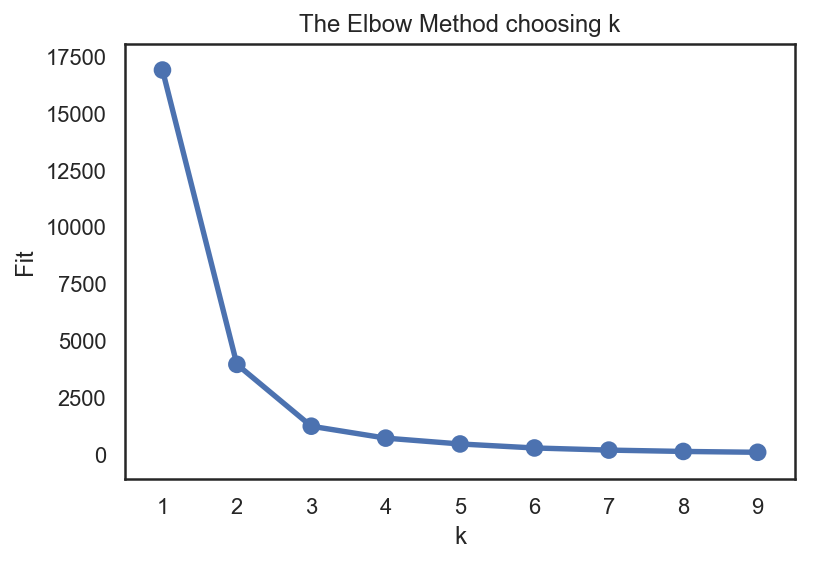

In [87]:
#Vemos a partir de la tecnica de codo, cual seria el numero bueno para ver cuantos clusters usamos en el regresor. 
# Let's plot the effect k on the clustering
ax = sns.pointplot(x=list(k_values),
                   y=scores);
ax.set(xlabel='k', 
       ylabel='Fit', 
       title='The Elbow Method choosing k');

In [89]:
#Comprobamos que a partir de 3 podemos mejorar nuestro rendimiento. 
#Inicializamos nuestro Clustering.Reocerdemos que un metodo no supervisado.
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=3) # Number of clusters should be 2 or 3
kmeans.fit(vc);

In [90]:
# Add the cluster labels for each data point to the dataframe
vc['kmeans_labels'] = kmeans.labels_

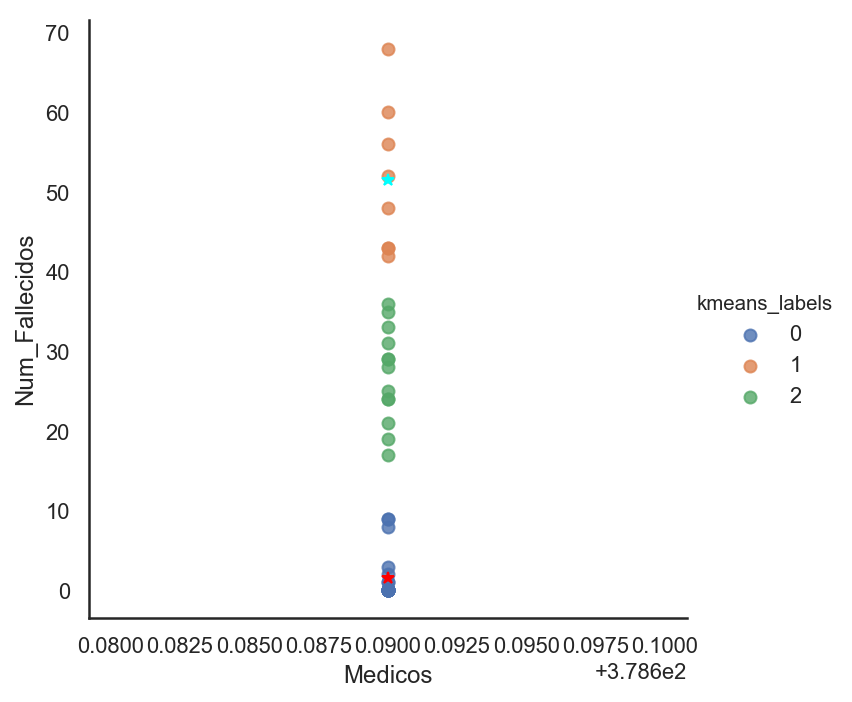

In [91]:
# Plot k-means
kmeans_plot = sns.lmplot(x=column_1, 
                         y=column_2, 
                         data=vc, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# # Plot the mean of cluster #3 (if present)
# kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

In [119]:
#Como vemos medicos al ser una constante no nos ofrec mucha informacion. 
# Seleccionamos las columnas mas importantes
column_1 = 'Num_casos'
column_2 = 'Num_Fallecidos'
vc = vc[[column_1, column_2]]

#Usamos ELBOW para comprobar cuantos clusteres usar: 
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(vc).score(vc) 
              for i, model in enumerate(k_mean_models)]


In [120]:
#Comprobamos que a partir de 3 podemos mejorar nuestro rendimiento. 
#Inicializamos nuestro Clustering.Reocerdemos que un metodo no supervisado.
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=2) # Number of clusters should be 2 or 3
kmeans.fit(vc);

In [121]:
# Add the cluster labels for each data point to the dataframe
vc['kmeans_labels'] = kmeans.labels_

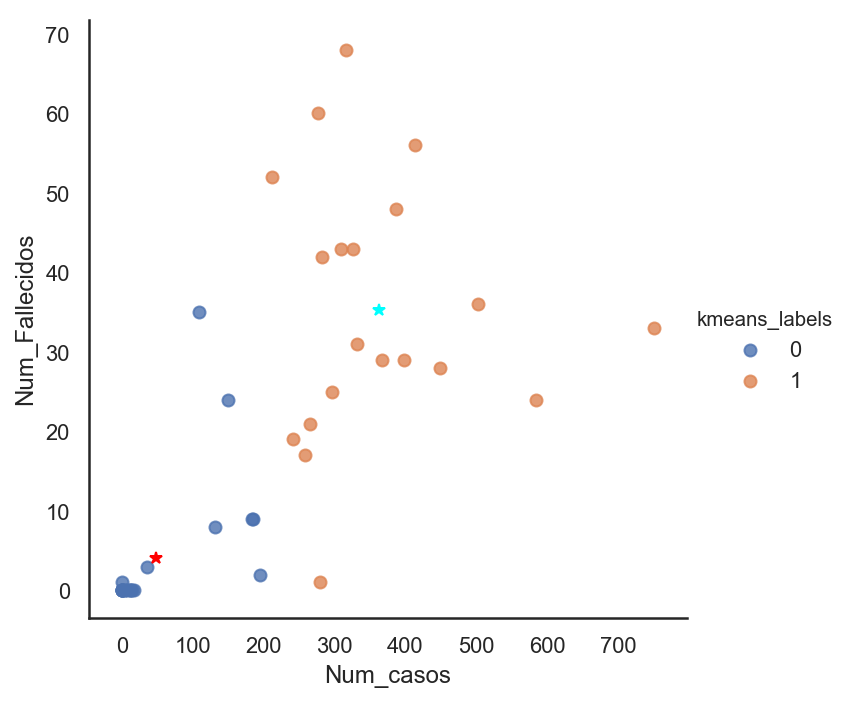

In [122]:
# Plot k-means
kmeans_plot = sns.lmplot(x=column_1, 
                         y=column_2,
                         data=vc, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# # Plot the mean of cluster #3 (if present)
#kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

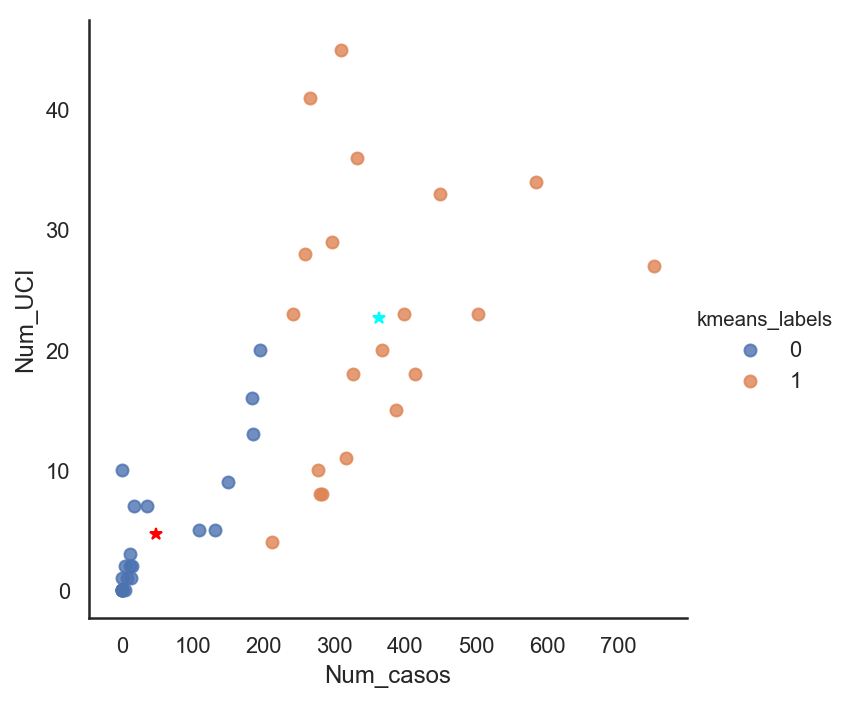

In [124]:
#Como vemos medicos al ser una constante no nos ofrec mucha informacion. 
# Seleccionamos las columnas mas importantes.
#Campos a analizar: 
#'Fecha','CCAA','Region Desc','CASOS','Fallecidos','Hospitalizados','Recuperados','UCI' 'NUTS2','Densidad',
#'Medicos' 'Hombres','Mujeres','Camas','Ratio_Casos','Ratio_Fallecidos','Ratio_Hospitalizados','Ratio_Recuperados','Ratio_UCI',
#'Num_casos','Ratio_Num_casos','Num_Fallecidos','Ratio_Num_Fallecidos','Num_Recuperados','Ratio_Num_Recuperados',
#'Num_Hospitalizados','Ratio_Num_Hospitalizados','Num_UCI','Ratio_Num_UCI','Ratio_Medicos','Ratio_Camas','dias_desde_caso_10']
#Vamos a representar por comunidad autonoma. Los datos que se muestran: 

#En el X, representamos la fecha
#En el eje Y numero de casos. 
vc=df[df['CCAA'] == 'VC']
Comunidad ='VC'

column_1 = 'Num_casos'
column_2 = 'Num_UCI'
vc = vc[[column_1, column_2]]

#Usamos ELBOW para comprobar cuantos clusteres usar: 
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(vc).score(vc) 
              for i, model in enumerate(k_mean_models)]
#Comprobamos que a partir de 3 podemos mejorar nuestro rendimiento. 
#Inicializamos nuestro Clustering.Reocerdemos que un metodo no supervisado.
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=2) # Number of clusters should be 2 or 3
kmeans.fit(vc);
# Add the cluster labels for each data point to the dataframe
vc['kmeans_labels'] = kmeans.labels_
# Plot k-means
kmeans_plot = sns.lmplot(x=column_1, 
                         y=column_2,
                         data=vc, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# # Plot the mean of cluster #3 (if present)
#kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

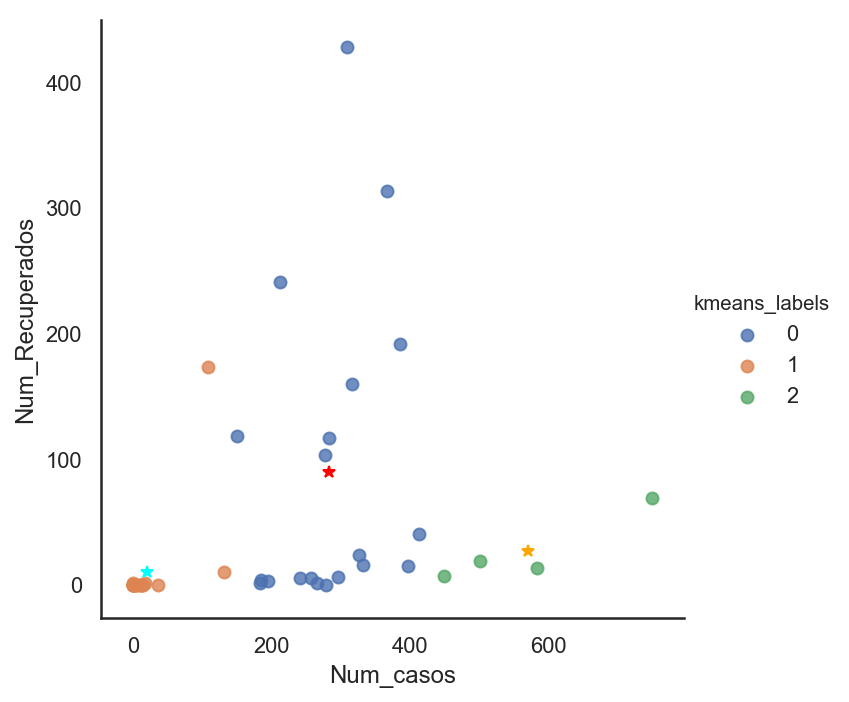

In [126]:
#Como vemos medicos al ser una constante no nos ofrec mucha informacion. 
# Seleccionamos las columnas mas importantes.
#Campos a analizar: 
#'Fecha','CCAA','Region Desc','CASOS','Fallecidos','Hospitalizados','Recuperados','UCI' 'NUTS2','Densidad',
#'Medicos' 'Hombres','Mujeres','Camas','Ratio_Casos','Ratio_Fallecidos','Ratio_Hospitalizados','Ratio_Recuperados','Ratio_UCI',
#'Num_casos','Ratio_Num_casos','Num_Fallecidos','Ratio_Num_Fallecidos','Num_Recuperados','Ratio_Num_Recuperados',
#'Num_Hospitalizados','Ratio_Num_Hospitalizados','Num_UCI','Ratio_Num_UCI','Ratio_Medicos','Ratio_Camas','dias_desde_caso_10']
#Vamos a representar por comunidad autonoma. Los datos que se muestran: 

#En el X, representamos la fecha
#En el eje Y numero de casos. 
vc=df[df['CCAA'] == 'VC']
Comunidad ='VC'

column_1 = 'Num_casos'
column_2 = 'Num_Recuperados'
vc = vc[[column_1, column_2]]

#Usamos ELBOW para comprobar cuantos clusteres usar: 
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(vc).score(vc) 
              for i, model in enumerate(k_mean_models)]
#Comprobamos que a partir de 3 podemos mejorar nuestro rendimiento. 
#Inicializamos nuestro Clustering.Reocerdemos que un metodo no supervisado.
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=3) # Number of clusters should be 2 or 3
kmeans.fit(vc);
# Add the cluster labels for each data point to the dataframe
vc['kmeans_labels'] = kmeans.labels_
# Plot k-means
kmeans_plot = sns.lmplot(x=column_1, 
                         y=column_2,
                         data=vc, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# # Plot the mean of cluster #3 (if present)
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

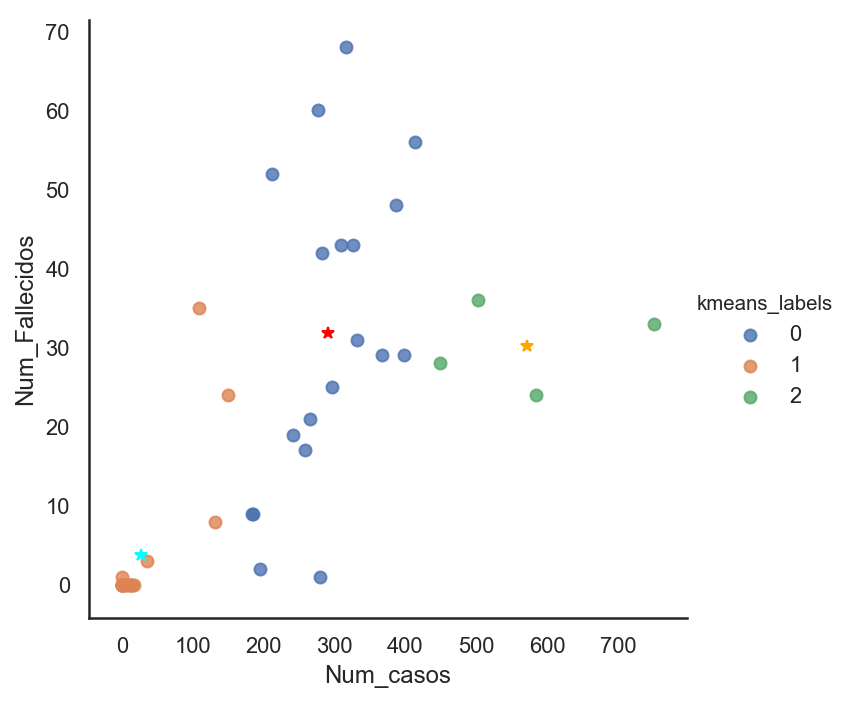

In [127]:
#Como vemos medicos al ser una constante no nos ofrec mucha informacion. 
# Seleccionamos las columnas mas importantes.
#Campos a analizar: 
#'Fecha','CCAA','Region Desc','CASOS','Fallecidos','Hospitalizados','Recuperados','UCI' 'NUTS2','Densidad',
#'Medicos' 'Hombres','Mujeres','Camas','Ratio_Casos','Ratio_Fallecidos','Ratio_Hospitalizados','Ratio_Recuperados','Ratio_UCI',
#'Num_casos','Ratio_Num_casos','Num_Fallecidos','Ratio_Num_Fallecidos','Num_Recuperados','Ratio_Num_Recuperados',
#'Num_Hospitalizados','Ratio_Num_Hospitalizados','Num_UCI','Ratio_Num_UCI','Ratio_Medicos','Ratio_Camas','dias_desde_caso_10']
#Vamos a representar por comunidad autonoma. Los datos que se muestran: 

#En el X, representamos la fecha
#En el eje Y numero de casos. 
vc=df[df['CCAA'] == 'VC']
Comunidad ='VC'

column_1 = 'Num_casos'
column_2 = 'Num_Fallecidos'
vc = vc[[column_1, column_2]]

#Usamos ELBOW para comprobar cuantos clusteres usar: 
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(vc).score(vc) 
              for i, model in enumerate(k_mean_models)]
#Comprobamos que a partir de 3 podemos mejorar nuestro rendimiento. 
#Inicializamos nuestro Clustering.Reocerdemos que un metodo no supervisado.
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=3) # Number of clusters should be 2 or 3
kmeans.fit(vc);
# Add the cluster labels for each data point to the dataframe
vc['kmeans_labels'] = kmeans.labels_
# Plot k-means
kmeans_plot = sns.lmplot(x=column_1, 
                         y=column_2,
                         data=vc, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# # Plot the mean of cluster #3 (if present)
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

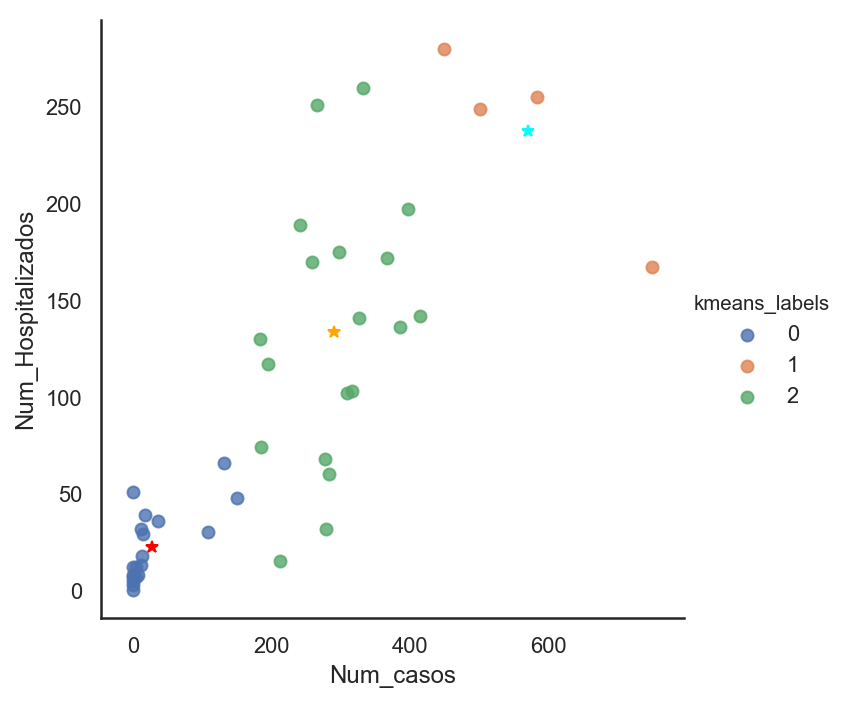

In [128]:
#Como vemos medicos al ser una constante no nos ofrec mucha informacion. 
# Seleccionamos las columnas mas importantes.
#Campos a analizar: 
#'Fecha','CCAA','Region Desc','CASOS','Fallecidos','Hospitalizados','Recuperados','UCI' 'NUTS2','Densidad',
#'Medicos' 'Hombres','Mujeres','Camas','Ratio_Casos','Ratio_Fallecidos','Ratio_Hospitalizados','Ratio_Recuperados','Ratio_UCI',
#'Num_casos','Ratio_Num_casos','Num_Fallecidos','Ratio_Num_Fallecidos','Num_Recuperados','Ratio_Num_Recuperados',
#'Num_Hospitalizados','Ratio_Num_Hospitalizados','Num_UCI','Ratio_Num_UCI','Ratio_Medicos','Ratio_Camas','dias_desde_caso_10']
#Vamos a representar por comunidad autonoma. Los datos que se muestran: 

#En el X, representamos la fecha
#En el eje Y numero de casos. 
vc=df[df['CCAA'] == 'VC']
Comunidad ='VC'

column_1 = 'Num_casos'
column_2 = 'Num_Hospitalizados'
vc = vc[[column_1, column_2]]

#Usamos ELBOW para comprobar cuantos clusteres usar: 
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(vc).score(vc) 
              for i, model in enumerate(k_mean_models)]
#Comprobamos que a partir de 3 podemos mejorar nuestro rendimiento. 
#Inicializamos nuestro Clustering.Reocerdemos que un metodo no supervisado.
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=3) # Number of clusters should be 2 or 3
kmeans.fit(vc);
# Add the cluster labels for each data point to the dataframe
vc['kmeans_labels'] = kmeans.labels_
# Plot k-means
kmeans_plot = sns.lmplot(x=column_1, 
                         y=column_2,
                         data=vc, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# # Plot the mean of cluster #3 (if present)
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

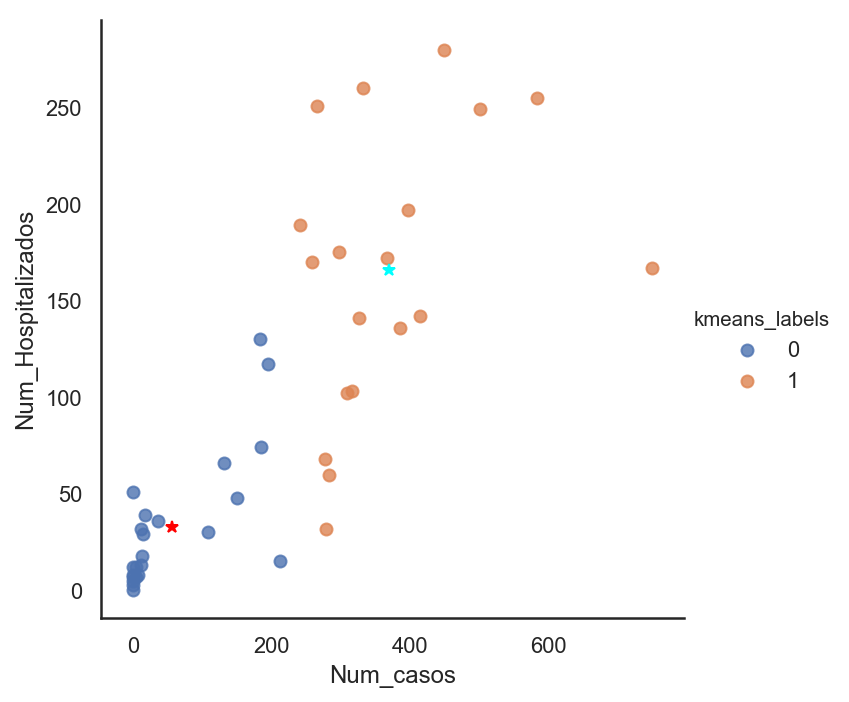

In [129]:
#NUMERO DE CASOS Y LA RELACION CON LOS HOSPITALIZADOS. 
#CLUSTERING =2


#Como vemos medicos al ser una constante no nos ofrec mucha informacion. 
# Seleccionamos las columnas mas importantes.
#Campos a analizar: 
#'Fecha','CCAA','Region Desc','CASOS','Fallecidos','Hospitalizados','Recuperados','UCI' 'NUTS2','Densidad',
#'Medicos' 'Hombres','Mujeres','Camas','Ratio_Casos','Ratio_Fallecidos','Ratio_Hospitalizados','Ratio_Recuperados','Ratio_UCI',
#'Num_casos','Ratio_Num_casos','Num_Fallecidos','Ratio_Num_Fallecidos','Num_Recuperados','Ratio_Num_Recuperados',
#'Num_Hospitalizados','Ratio_Num_Hospitalizados','Num_UCI','Ratio_Num_UCI','Ratio_Medicos','Ratio_Camas','dias_desde_caso_10']
#Vamos a representar por comunidad autonoma. Los datos que se muestran: 

#En el X, representamos la fecha
#En el eje Y numero de casos. 
vc=df[df['CCAA'] == 'VC']
Comunidad ='VC'

column_1 = 'Num_casos'
column_2 = 'Num_Hospitalizados'
vc = vc[[column_1, column_2]]

#Usamos ELBOW para comprobar cuantos clusteres usar: 
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(vc).score(vc) 
              for i, model in enumerate(k_mean_models)]
#Comprobamos que a partir de 3 podemos mejorar nuestro rendimiento. 
#Inicializamos nuestro Clustering.Reocerdemos que un metodo no supervisado.
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=2) # Number of clusters should be 2 or 3
kmeans.fit(vc);
# Add the cluster labels for each data point to the dataframe
vc['kmeans_labels'] = kmeans.labels_
# Plot k-means
kmeans_plot = sns.lmplot(x=column_1, 
                         y=column_2,
                         data=vc, 
                         fit_reg=False,        # Do not fit a regression line to the data
                         hue="kmeans_labels",  #'hue' will color code each group
                         legend=True);
#Para cada k cluster representamos los valores, como vemos el comportamiento es de matriz[filas][columnas]

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# # Plot the mean of cluster #3 (if present)
#kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');